# Dynamics of Open Source Movements

#### Section 4: Competing with Open Source 

This section is the replication of Section 4.4 on **Dynamic Profit Maximization**, in the paper. Full paper is availiable [here](http://economics.mit.edu/files/12002)
List of Variables:

α $\rightarrow$ Probability of being altruistic 

K $\rightarrow$ Sharing Cost

E $\rightarrow$ Programming Cost

p $\rightarrow$ price

v $\rightarrow$ customer value of the commercial software

b0 $\rightarrow$ is a choice between two goods: the commercial softwarethat provides utility ``v−p``

λ $\rightarrow$ parameter of the need arrival process.

b $\rightarrow$ represents the altrustic share of population

δ and β $\rightarrow$ depriciation rates

Value of $B_{ij}$ is assumed to be drawn from Normal Distribution [0,10]. 



In [1]:
using DifferentialEquations
using Plots
gr()
theme(:ggplot2)

In [2]:
function ode_func!(du,u,params,t)
    q, b = u
    α, β, δ, λ, v, p, E, a, K, G = params
    du[1] = dq = λ*(1-q)*b*(1-G(v-p+E-a+K)) - β*q # u[1]
    du[2] = db = α*λ*q*(1-b)*(1-G(v-p)) - δ*b # u[2]
end

ode_func! (generic function with 1 method)

In [3]:
a = 2; K=1; E=0.5; α=0.5; β=0.5; δ=0.9; v=3; λ=1; p=1000
G(x) = 0 ≤ x ≤ 10 ? 1/10 : 0 # uniform distribution on [0,10]
params = [α, β, δ, λ, v, p, E, a, K, G]
q0=0.4; b0=0.2; u0 = [q0, b0]
tspan=(0.0,10.0)

ode_prob = ODEProblem(ode_func!,u0,tspan,params)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [0.4, 0.2]

In [5]:
ode_sol = solve(ode_prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 12-element Array{Float64,1}:
  0.0
  0.14469917549356076
  0.46992629242286105
  0.8903915791566719
  1.4243794692799074
  2.085552573092113
  2.901420721982187
  3.908805163509644
  5.173164656772485
  6.813736689048158
  9.214746203906447
 10.0
u: 12-element Array{Array{Float64,1},1}:
 [0.4, 0.2]
 [0.3888652865634234, 0.19701416480804237]
 [0.3666537410543332, 0.1898838819229497]
 [0.342464762945524, 0.18048143143207346]
 [0.3170828073884595, 0.1690842987144271]
 [0.2914710299095795, 0.15642230383097558]
 [0.26600532740558813, 0.14312180753670875]
 [0.24101066556858242, 0.12972896328649172]
 [0.2165427074269258, 0.11650419776515153]
 [0.19246539529495385, 0.10347599931184955]
 [0.16712352072357992, 0.08978316117626935]
 [0.16058568294432324, 0.08625250636722075]

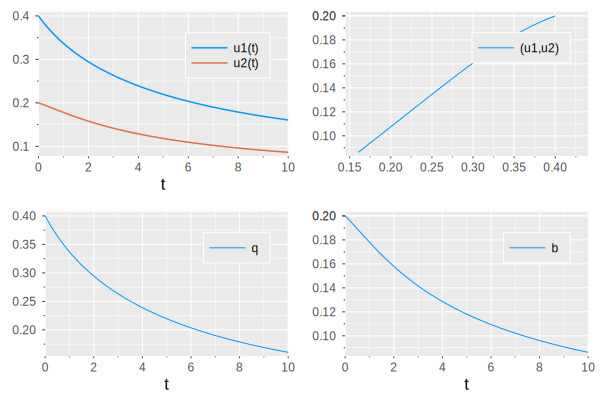

In [6]:
xyzt = plot(ode_sol, plotdensity=10000,lw=1.5)
xy = plot(ode_sol, plotdensity=10000, vars=(1), label = "q")
xz = plot(ode_sol, plotdensity=10000, vars=(2), label = "b")
xyz = plot(ode_sol, plotdensity=10000, vars=(1,2))
plot(plot(xyzt,xyz),plot(xy, xz, layout=(1,2),w=1), layout=(2,1))